In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import re
import json
import random
import time
import csv
import os

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocessing

In [14]:
# Set it as the working directory
base_dir = "/content/drive/My Drive/YouTube API/Data"
output_file = "Clean STAT 1001 Youtube Experiment.csv"
os.chdir(base_dir)
print(f"Working directory set to: {os.getcwd()}")

def filter_csv_by_date(input_file, output_file):
    with open(input_file, 'r', newline='') as infile:
        reader = csv.reader(infile)
        header = next(reader)

        # Keep header and rows with timestamps containing "04/17"
        filtered_rows = [header]
        for row in reader:
            if row and "04/14" not in row[0]:  # Assuming Timestamp is the first column
                filtered_rows.append(row)

    with open(output_file, 'w', newline='') as outfile:
        csv.writer(outfile).writerows(filtered_rows)

    print(f"Filtered data saved to {output_file}")

# clean data, filter out consulting-class data
filter_csv_by_date('STAT 1001 Youtube Experiment.csv', output_file)

Working directory set to: /content/drive/My Drive/YouTube API
Filtered data saved to Clean STAT 1001 Youtube Experiment.csv


# Post-Analysis

In [37]:
def find_top_category(df_name):
    df = pd.read_csv(df_name)
    print(df.head())
    category_ct = df['category'].value_counts().sort_values(ascending=False)
    print(category_ct)
    # plot
    plt.figure(figsize=(8, 5))
    category_ct.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title("Video Counts by Category of " + df_name, fontsize=16)
    plt.xlabel("Category", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # show each col's value
    for i, count in enumerate(category_ct):
        plt.text(i, count + 0.2, str(count), ha='center', va='bottom')

    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    plt.close()
    return

In [40]:
def compare_top_categories(personal_csv: str, private_csv: str, output_name:str):
    # Read both dataframes
    df_personal = pd.read_csv(personal_csv)
    df_private = pd.read_csv(private_csv)

    # Count categories
    cat_personal = df_personal['category'].value_counts()
    cat_private = df_private['category'].value_counts()

    # Combine into one DataFrame
    combined = pd.DataFrame({
        'Personalized': cat_personal,
        'Non-Personalized': cat_private
    }).fillna(0)

    # Sort by total frequency
    combined['Total'] = combined['Personalized'] + combined['Non-Personalized']
    combined = combined.sort_values(by='Total', ascending=False).drop(columns='Total')

    # Plot side-by-side bars
    ax = combined.plot(kind='bar', figsize=(10, 6), color=['red', 'blue'], edgecolor='black')
    plt.title("Top Video Categories: Personalized vs Non-Personalized", fontsize=16)
    plt.xlabel("Category", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Annotate bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', label_type='edge', padding=2)

    plt.tight_layout()
    plt.savefig(output_name)
    plt.show()
    plt.close()


Working directory set to: /content/drive/My Drive/YouTube API/Results


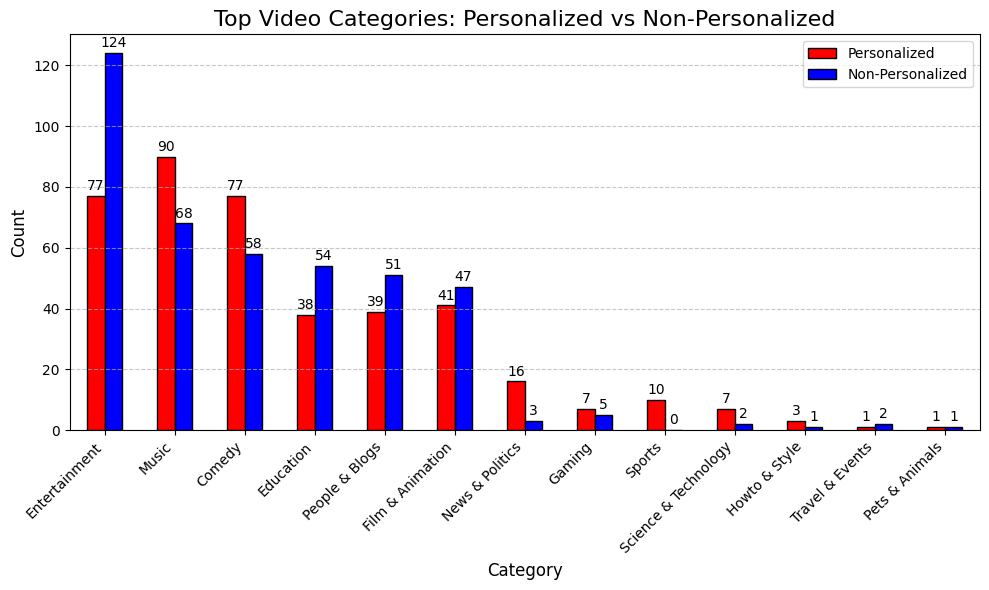

In [41]:
# Set it as the working directory
base_dir = "/content/drive/My Drive/YouTube API/Results"
os.chdir(base_dir)
print(f"Working directory set to: {os.getcwd()}")

compare_top_categories("personalized_output.csv", "non_personalized_output.csv", "combined_output.png")

      video_id                                              title  \
0  7jjcAuEYW9M                                    The Duck Song 2   
1  Au6lM-ubCVI  Dubai 4K - Driving Downtown - Skyline Sunrise ...   
2  LZrrtF8Iy8k            The Worst New Transit Project in the US   
3  nHaiBLeLXjw  The Infomercial Scammer Who Wanted You to Buy ...   
4  mHU-FMO0Xp8                        How Mexico Made a Plutocrat   

   category_id         category                                          url  
0           23           Comedy  https://www.youtube.com/watch?v=7jjcAuEYW9M  
1           19  Travel & Events  https://www.youtube.com/watch?v=Au6lM-ubCVI  
2           27        Education  https://www.youtube.com/watch?v=LZrrtF8Iy8k  
3           27        Education  https://www.youtube.com/watch?v=nHaiBLeLXjw  
4           27        Education  https://www.youtube.com/watch?v=mHU-FMO0Xp8  
category
Music                   90
Comedy                  77
Entertainment           77
Film & Animation     

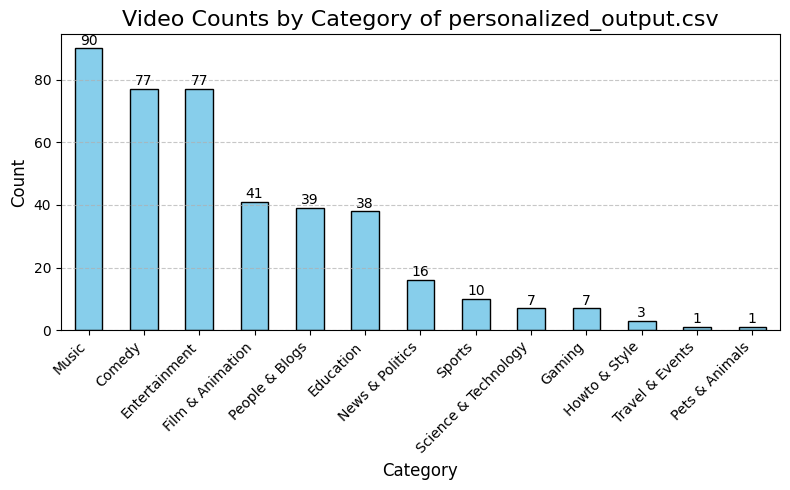

In [42]:
find_top_category("personalized_output.csv")

      video_id                                              title  \
0  -GSnmRZlgc4  Pete the Cat I Love My White Shoes | Animated ...   
1  N2HQaQJsyQ4  Disney Lofi Songs [chill playlist] 🎀 2h chill ...   
2  i9sR_T76H34  FALL INTO SLEEP INSTANTLY ★︎ Healing of Stress...   
3  C1UgGbiUTTo  Harvard Rejects Trump Order, SCOTUS Gets Left ...   
4  dQw4w9WgXcQ  Rick Astley - Never Gonna Give You Up (Officia...   

   category_id          category                                          url  
0            1  Film & Animation  https://www.youtube.com/watch?v=-GSnmRZlgc4  
1           10             Music  https://www.youtube.com/watch?v=N2HQaQJsyQ4  
2           10             Music  https://www.youtube.com/watch?v=i9sR_T76H34  
3           23            Comedy  https://www.youtube.com/watch?v=C1UgGbiUTTo  
4           10             Music  https://www.youtube.com/watch?v=dQw4w9WgXcQ  
category
Entertainment           124
Music                    68
Comedy                   58
Education   

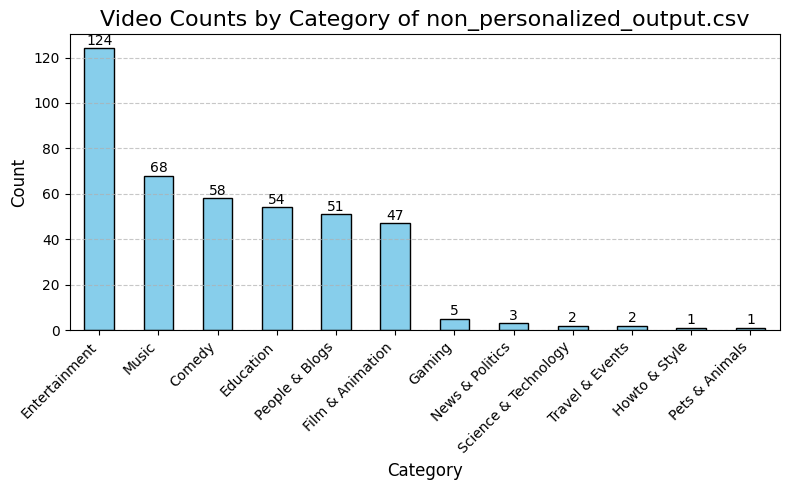

In [46]:
find_top_category("non_personalized_output.csv")

In [45]:
df_personal = pd.read_csv("/content/drive/My Drive/YouTube API/Results/personalized_output.csv")
df_private = pd.read_csv("/content/drive/My Drive/YouTube API/Results/non_personalized_output.csv")

print("PERSONAL HEAD:\n", df_personal.head())
print("\nNON-PERSONALIZED HEAD:\n", df_private.head())

print("PERSONAL VALUE COUNTS:\n", df_personal["category"].value_counts())
print("\nNON-PERSONALIZED VALUE COUNTS:\n", df_private["category"].value_counts())

PERSONAL HEAD:
       video_id                                              title  \
0  7jjcAuEYW9M                                    The Duck Song 2   
1  Au6lM-ubCVI  Dubai 4K - Driving Downtown - Skyline Sunrise ...   
2  LZrrtF8Iy8k            The Worst New Transit Project in the US   
3  nHaiBLeLXjw  The Infomercial Scammer Who Wanted You to Buy ...   
4  mHU-FMO0Xp8                        How Mexico Made a Plutocrat   

   category_id         category                                          url  
0           23           Comedy  https://www.youtube.com/watch?v=7jjcAuEYW9M  
1           19  Travel & Events  https://www.youtube.com/watch?v=Au6lM-ubCVI  
2           27        Education  https://www.youtube.com/watch?v=LZrrtF8Iy8k  
3           27        Education  https://www.youtube.com/watch?v=nHaiBLeLXjw  
4           27        Education  https://www.youtube.com/watch?v=mHU-FMO0Xp8  

NON-PERSONALIZED HEAD:
       video_id                                              title  \
0

# Slides

In [59]:
def merge_csv_files(personalized_file, non_personalized_file, output_file, is_random):
    personalized_df = pd.read_csv(personalized_file)
    non_personalized_df = pd.read_csv(non_personalized_file)

    # Add a column to indicate personalization type
    personalized_df['personalized?'] = 'Yes'
    non_personalized_df['personalized?'] = 'No'

    # Merge
    merged_df = pd.concat([personalized_df, non_personalized_df], ignore_index=True)

    # Reorder columns to have recommendation_type first, followed by category, then others
    # Adjust column order as needed
    cols = ['video_id', 'personalized?', 'category', 'category_id', 'title', 'url']

    # Reorder dataframe columns
    merged_df = merged_df[cols]

    if is_random:
        # Sort alphabetically by video_id
        merged_df = merged_df.sample(frac=1, random_state=42).reset_index(drop=True)

    # Save the merged dataframe to CSV
    merged_df.to_csv(output_file, index=False)
    print(f"Successfully merged files and saved to {output_file}")
    return True

In [61]:
# Set it as the working directory
base_dir = "/content/drive/My Drive/YouTube API/Results"
os.chdir(base_dir)
print(f"Working directory set to: {os.getcwd()}")

#compare_top_categories("personalized_output.csv", "non_personalized_output.csv", "combined_output.png")
merge_csv_files("personalized_output.csv","non_personalized_output.csv", "merged_output.csv", True)

Working directory set to: /content/drive/My Drive/YouTube API/Results
Successfully merged files and saved to merged_output.csv


True